In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Data file.csv')
df.head()

Unnamed: 0  label       msisdn    aon  daily_decr30  daily_decr90  \
0           1      0  21408I70789  272.0   3055.050000   3065.150000   
1           2      1  76462I70374  712.0  12122.000000  12124.750000   
2           3      1  17943I70372  535.0   1398.000000   1398.000000   
3           4      1  55773I70781  241.0     21.228000     21.228000   
4           5      1  03813I82730  947.0    150.619333    150.619333   

   rental30  rental90  last_rech_date_ma  last_rech_date_da  ...  \
0    220.13    260.13                2.0                0.0  ...   
1   3691.26   3691.26               20.0                0.0  ...   
2    900.13    900.13                3.0                0.0  ...   
3    159.42    159.42               41.0                0.0  ...   
4   1098.90   1098.90                4.0                0.0  ...   

   maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  \
0              6.0                 0.0          2.0            12   
1             12.0                 0.0          1.0            12   
2              6.0                 0.0          1.0             6   
3              6.0                 0.0          2.0            12   
4              6.0                 0.0          7.0            42   

   maxamnt_loans90  medianamnt_loans90  payback30  payback90  pcircle  \
0                6                 0.0  29.000000  29.000000      UPW   
1               12                 0.0   0.000000   0.000000      UPW   
2                6                 0.0   0.000000   0.000000      UPW   
3                6                 0.0   0.000000   0.000000      UPW   
4                6                 0.0   2.333333   2.333333      UPW   

        pdate  
0  2016-07-20  
1  2016-08-10  
2  2016-08-19  
3  2016-06-06  
4  2016-06-22  

[5 rows x 37 columns]

- Mobile Number and the telecom circle bear no bearing to the dataset as it cannnot determine whether a person can pay back loans or not.
- Hence dropping the columns

In [51]:
df.shape

(209593, 22)

In [3]:
df.drop(['Unnamed: 0', 'msisdn', 'pcircle'], axis=1, inplace=True)

In [4]:
df.head()

label    aon  daily_decr30  daily_decr90  rental30  rental90  \
0      0  272.0   3055.050000   3065.150000    220.13    260.13   
1      1  712.0  12122.000000  12124.750000   3691.26   3691.26   
2      1  535.0   1398.000000   1398.000000    900.13    900.13   
3      1  241.0     21.228000     21.228000    159.42    159.42   
4      1  947.0    150.619333    150.619333   1098.90   1098.90   

   last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  ...  \
0                2.0                0.0              1539              2  ...   
1               20.0                0.0              5787              1  ...   
2                3.0                0.0              1539              1  ...   
3               41.0                0.0               947              0  ...   
4                4.0                0.0              2309              7  ...   

   amnt_loans30  maxamnt_loans30  medianamnt_loans30  cnt_loans90  \
0            12              6.0                 0.0          2.0   
1            12             12.0                 0.0          1.0   
2             6              6.0                 0.0          1.0   
3            12              6.0                 0.0          2.0   
4            42              6.0                 0.0          7.0   

   amnt_loans90  maxamnt_loans90  medianamnt_loans90  payback30  payback90  \
0            12                6                 0.0  29.000000  29.000000   
1            12               12                 0.0   0.000000   0.000000   
2             6                6                 0.0   0.000000   0.000000   
3            12                6                 0.0   0.000000   0.000000   
4            42                6                 0.0   2.333333   2.333333   

        pdate  
0  2016-07-20  
1  2016-08-10  
2  2016-08-19  
3  2016-06-06  
4  2016-06-22  

[5 rows x 34 columns]

- There are many features which are similar metrics which might lead to multicolinearity for example, balance, split over 30 days and 90 days
- We can drop all the columns for 90 days as we can make predictions for the same if we have data for the activities in 30 days

In [5]:
df.drop(['daily_decr90', 'rental90', 'fr_ma_rech90', 'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
        'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans90', 'amnt_loans90',
        'maxamnt_loans90', 'medianamnt_loans90', 'payback90'], axis=1, inplace=True)

In [6]:
df.head()

label    aon  daily_decr30  rental30  last_rech_date_ma  last_rech_date_da  \
0      0  272.0   3055.050000    220.13                2.0                0.0   
1      1  712.0  12122.000000   3691.26               20.0                0.0   
2      1  535.0   1398.000000    900.13                3.0                0.0   
3      1  241.0     21.228000    159.42               41.0                0.0   
4      1  947.0    150.619333   1098.90                4.0                0.0   

   last_rech_amt_ma  cnt_ma_rech30  fr_ma_rech30  sumamnt_ma_rech30  \
0              1539              2          21.0             3078.0   
1              5787              1           0.0             5787.0   
2              1539              1           0.0             1539.0   
3               947              0           0.0                0.0   
4              2309              7           2.0            20029.0   

   medianamnt_ma_rech30  medianmarechprebal30  cnt_da_rech30  fr_da_rech30  \
0                1539.0                  7.50            0.0           0.0   
1                5787.0                 61.04            0.0           0.0   
2                1539.0                 66.32            0.0           0.0   
3                   0.0                  0.00            0.0           0.0   
4                2309.0                 29.00            0.0           0.0   

   cnt_loans30  amnt_loans30  maxamnt_loans30  medianamnt_loans30  payback30  \
0            2            12              6.0                 0.0  29.000000   
1            1            12             12.0                 0.0   0.000000   
2            1             6              6.0                 0.0   0.000000   
3            2            12              6.0                 0.0   0.000000   
4            7            42              6.0                 0.0   2.333333   

        pdate  
0  2016-07-20  
1  2016-08-10  
2  2016-08-19  
3  2016-06-06  
4  2016-06-22

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   aon                   209593 non-null  float64
 2   daily_decr30          209593 non-null  float64
 3   rental30              209593 non-null  float64
 4   last_rech_date_ma     209593 non-null  float64
 5   last_rech_date_da     209593 non-null  float64
 6   last_rech_amt_ma      209593 non-null  int64  
 7   cnt_ma_rech30         209593 non-null  int64  
 8   fr_ma_rech30          209593 non-null  float64
 9   sumamnt_ma_rech30     209593 non-null  float64
 10  medianamnt_ma_rech30  209593 non-null  float64
 11  medianmarechprebal30  209593 non-null  float64
 12  cnt_da_rech30         209593 non-null  float64
 13  fr_da_rech30          209593 non-null  float64
 14  cnt_loans30           209593 non-null  int64  
 15  

- Converting the pdate feature from an object type to datetime 

In [8]:
df['pdate']=pd.to_datetime(df['pdate'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   label                 209593 non-null  int64         
 1   aon                   209593 non-null  float64       
 2   daily_decr30          209593 non-null  float64       
 3   rental30              209593 non-null  float64       
 4   last_rech_date_ma     209593 non-null  float64       
 5   last_rech_date_da     209593 non-null  float64       
 6   last_rech_amt_ma      209593 non-null  int64         
 7   cnt_ma_rech30         209593 non-null  int64         
 8   fr_ma_rech30          209593 non-null  float64       
 9   sumamnt_ma_rech30     209593 non-null  float64       
 10  medianamnt_ma_rech30  209593 non-null  float64       
 11  medianmarechprebal30  209593 non-null  float64       
 12  cnt_da_rech30         209593 non-null  float64       
 13 

In [10]:
df.isnull().sum()

label                   0
aon                     0
daily_decr30            0
rental30                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
payback30               0
pdate                   0
dtype: int64

- The data is complete with no null values

In [52]:
df.describe()

label            aon   daily_decr30       rental30  \
count  209593.000000  209593.000000  209593.000000  209593.000000   
mean        0.875177    8112.343445    5381.402289    2692.581910   
std         0.330519   75696.082531    9220.623400    4308.586781   
min         0.000000     -48.000000     -93.012667  -23737.140000   
25%         1.000000     246.000000      42.440000     280.420000   
50%         1.000000     527.000000    1469.175667    1083.570000   
75%         1.000000     982.000000    7244.000000    3356.940000   
max         1.000000  999860.755168  265926.000000  198926.110000   

       last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  \
count      209593.000000      209593.000000     209593.000000  209593.000000   
mean         3755.847800        3712.202921         15.121483       3.976521   
std         53905.892230       53374.833430         13.008039       4.220550   
min           -29.000000         -29.000000          0.000000       0.000000   
25%             1.000000           0.000000          4.000000       1.000000   
50%             3.000000           0.000000         14.000000       3.000000   
75%             7.000000           0.000000         23.000000       5.000000   
max        998650.377733      999171.809410         69.000000      70.000000   

        fr_ma_rech30  sumamnt_ma_rech30  ...  cnt_da_rech30   fr_da_rech30  \
count  209593.000000      209593.000000  ...  209593.000000  209593.000000   
mean     3737.355121        7704.501157  ...     262.578110    3749.494447   
std     53643.625172       10139.621714  ...    4183.897978   53885.414979   
min         0.000000           0.000000  ...       0.000000       0.000000   
25%         0.000000        1540.000000  ...       0.000000       0.000000   
50%         2.000000        4628.000000  ...       0.000000       0.000000   
75%         6.000000       10010.000000  ...       0.000000       0.000000   
max    999606.368132      810096.000000  ...   99914.441420  999809.240107   

         cnt_loans30   amnt_loans30  maxamnt_loans30  medianamnt_loans30  \
count  209593.000000  209593.000000    209593.000000       209593.000000   
mean        2.758852       2.991884       274.658747            0.054029   
std         2.552568       2.894914      4245.264648            0.218039   
min         0.000000       0.000000         0.000000            0.000000   
25%         1.000000       1.000000         6.000000            0.000000   
50%         2.000000       2.000000         6.000000            0.000000   
75%         4.000000       4.000000         6.000000            0.000000   
max        39.000000      47.000000     99864.560864            3.000000   

           payback30          Month      Year            Day  
count  209593.000000  209593.000000  209593.0  209593.000000  
mean        3.398826       1.202679       0.0       3.003569  
std         8.813729       0.741435       0.0       2.012786  
min         0.000000       0.000000       0.0       0.000000  
25%         0.000000       1.000000       0.0       1.000000  
50%         0.000000       1.000000       0.0       3.000000  
75%         3.750000       2.000000       0.0       5.000000  
max       171.500000       2.000000       0.0       6.000000  

[8 rows x 22 columns]

In [11]:
df['label'].value_counts()

1    183431
0     26162
Name: label, dtype: int64

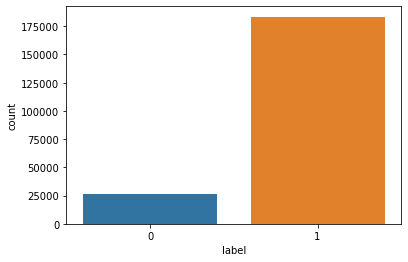

In [12]:
sns.countplot(
    x=df['label'],
    y=None,
    hue=None,
    data=None,
    order=None,
    hue_order=None,
    orient=None,
    color=None,
    palette=None,
    saturation=0.75,
    dodge=True,
    ax=None
)

In [13]:
round(((183431)/209593)*100,2)


87.52

- Almost 87% of the loans taken have been paid back in 5 days in the given dataset

In [14]:
plt.figure(figsize=(20,10))
sns.countplot(
    x=df['cnt_ma_rech30'],
    y=None,
    hue=None,
    data=None,
    order=None,
    hue_order=None,
    orient=None,
    color=None,
    palette=None,
    saturation=0.75,
    dodge=True,
    ax=None
)

- Most of the accounts were recharged from 0 - 15 times in the last 30 days

In [15]:
plt.figure(figsize=(25,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

- From the above heatmap, we can find
    - Last recharge amount and median amount are high

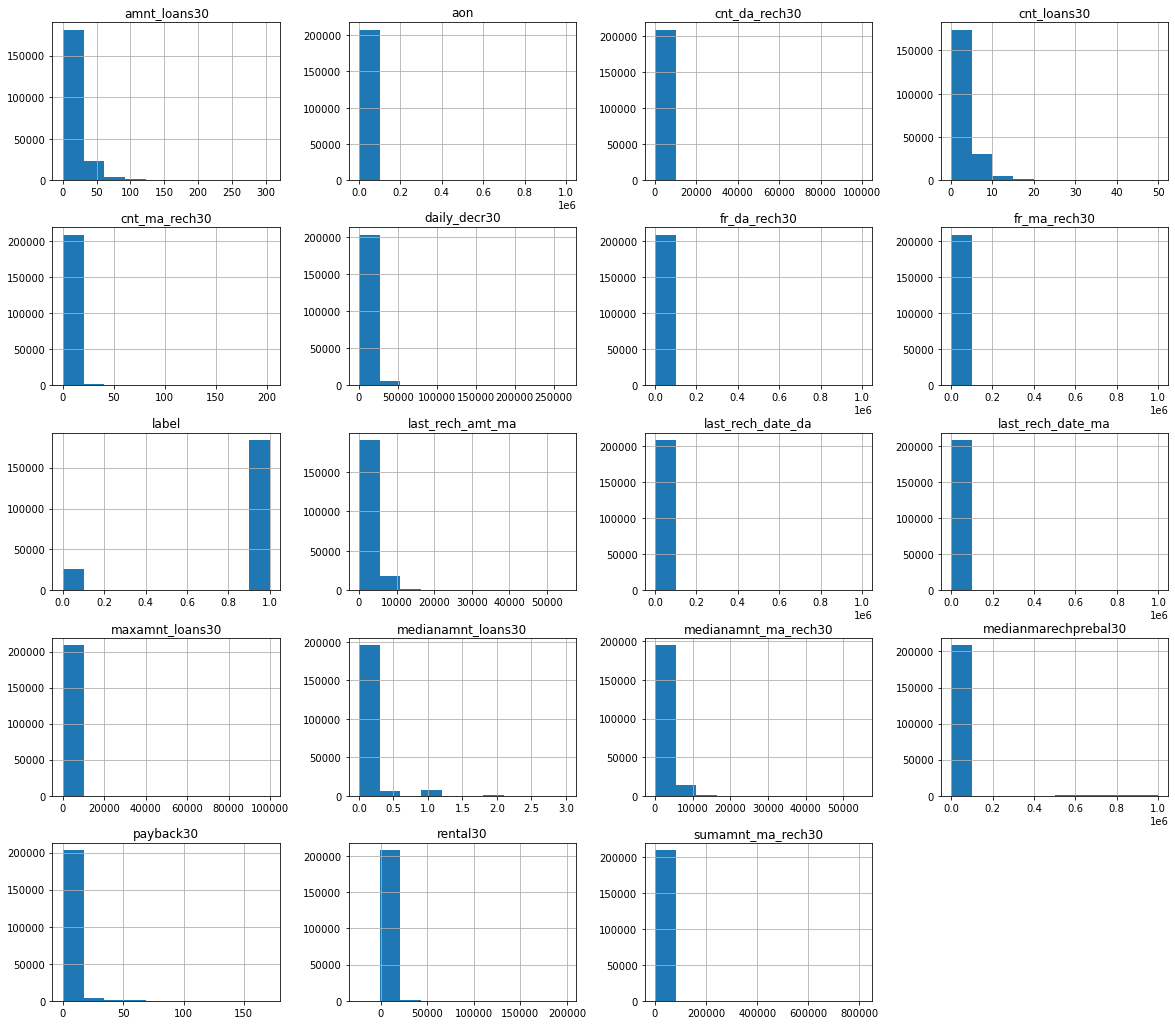

In [16]:
df.hist(figsize=(20,18))
plt.show()

In [17]:
df.skew()

label                   -2.270254
aon                     10.392949
daily_decr30             3.946230
rental30                 4.521929
last_rech_date_ma       14.790974
last_rech_date_da       14.814857
last_rech_amt_ma         3.781149
cnt_ma_rech30            3.283842
fr_ma_rech30            14.772833
sumamnt_ma_rech30        6.386787
medianamnt_ma_rech30     3.512324
medianmarechprebal30    14.779875
cnt_da_rech30           17.818364
fr_da_rech30            14.776430
cnt_loans30              2.713421
amnt_loans30             2.975719
maxamnt_loans30         17.658052
medianamnt_loans30       4.551043
payback30                8.310695
dtype: float64

In [18]:
df["Month"]=df["pdate"].dt.month_name()
df["Year"]=df["pdate"].dt.year
df["Day"]=df['pdate'].dt.day_name()

In [19]:
df.head()

label    aon  daily_decr30  rental30  last_rech_date_ma  last_rech_date_da  \
0      0  272.0   3055.050000    220.13                2.0                0.0   
1      1  712.0  12122.000000   3691.26               20.0                0.0   
2      1  535.0   1398.000000    900.13                3.0                0.0   
3      1  241.0     21.228000    159.42               41.0                0.0   
4      1  947.0    150.619333   1098.90                4.0                0.0   

   last_rech_amt_ma  cnt_ma_rech30  fr_ma_rech30  sumamnt_ma_rech30  ...  \
0              1539              2          21.0             3078.0  ...   
1              5787              1           0.0             5787.0  ...   
2              1539              1           0.0             1539.0  ...   
3               947              0           0.0                0.0  ...   
4              2309              7           2.0            20029.0  ...   

   fr_da_rech30  cnt_loans30  amnt_loans30  maxamnt_loans30  \
0           0.0            2            12              6.0   
1           0.0            1            12             12.0   
2           0.0            1             6              6.0   
3           0.0            2            12              6.0   
4           0.0            7            42              6.0   

   medianamnt_loans30  payback30      pdate   Month  Year        Day  
0                 0.0  29.000000 2016-07-20    July  2016  Wednesday  
1                 0.0   0.000000 2016-08-10  August  2016  Wednesday  
2                 0.0   0.000000 2016-08-19  August  2016     Friday  
3                 0.0   0.000000 2016-06-06    June  2016     Monday  
4                 0.0   2.333333 2016-06-22    June  2016  Wednesday  

[5 rows x 23 columns]

In [20]:
df.drop('pdate', axis=1, inplace=True)

In [21]:
sns.countplot(
    x=df['Month'],
    y=None,
    data=None,
    order=None,
    hue_order=None,
    orient=None,
    color=None,
    palette=None,
    saturation=0.75,
    dodge=True,
    ax=None
)

In [22]:
sns.countplot(
    x=df['Month'],
    y=None,
    hue=df['label'],
    data=None,
    order=None,
    hue_order=None,
    orient=None,
    color=None,
    palette=None,
    saturation=0.75,
    dodge=True,
    ax=None
)

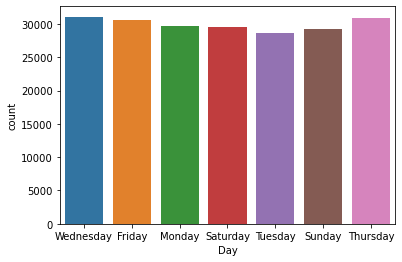

In [23]:
sns.countplot(
    x=df['Day'],
    y=None,
    data=None,
    order=None,
    hue_order=None,
    orient=None,
    color=None,
    palette=None,
    saturation=0.75,
    dodge=True,
    ax=None
)

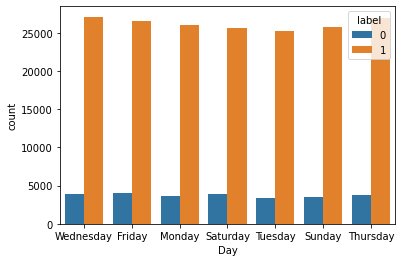

In [24]:
sns.countplot(
    x=df['Day'],
    y=None,
    hue=df['label'],
    data=None,
    order=None,
    hue_order=None,
    orient=None,
    color=None,
    palette=None,
    saturation=0.75,
    dodge=True,
    ax=None
)

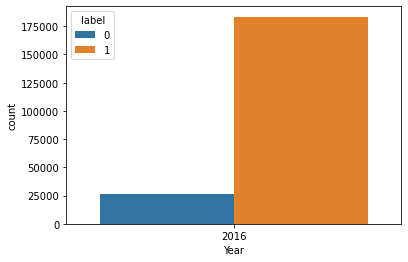

In [25]:
sns.countplot(
    x=df['Year'],
    y=None,
    hue=df['label'],
    data=None,
    order=None,
    hue_order=None,
    orient=None,
    color=None,
    palette=None,
    saturation=0.75,
    dodge=True,
    ax=None
)

In [26]:
df.head()

label    aon  daily_decr30  rental30  last_rech_date_ma  last_rech_date_da  \
0      0  272.0   3055.050000    220.13                2.0                0.0   
1      1  712.0  12122.000000   3691.26               20.0                0.0   
2      1  535.0   1398.000000    900.13                3.0                0.0   
3      1  241.0     21.228000    159.42               41.0                0.0   
4      1  947.0    150.619333   1098.90                4.0                0.0   

   last_rech_amt_ma  cnt_ma_rech30  fr_ma_rech30  sumamnt_ma_rech30  ...  \
0              1539              2          21.0             3078.0  ...   
1              5787              1           0.0             5787.0  ...   
2              1539              1           0.0             1539.0  ...   
3               947              0           0.0                0.0  ...   
4              2309              7           2.0            20029.0  ...   

   cnt_da_rech30  fr_da_rech30  cnt_loans30  amnt_loans30  maxamnt_loans30  \
0            0.0           0.0            2            12              6.0   
1            0.0           0.0            1            12             12.0   
2            0.0           0.0            1             6              6.0   
3            0.0           0.0            2            12              6.0   
4            0.0           0.0            7            42              6.0   

   medianamnt_loans30  payback30   Month  Year        Day  
0                 0.0  29.000000    July  2016  Wednesday  
1                 0.0   0.000000  August  2016  Wednesday  
2                 0.0   0.000000  August  2016     Friday  
3                 0.0   0.000000    June  2016     Monday  
4                 0.0   2.333333    June  2016  Wednesday  

[5 rows x 22 columns]

In [27]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [28]:
le=LabelEncoder() 
for column in df.columns:
    if df[column].dtype!=np.number:
         df[column]=le.fit_transform(df[column])

In [29]:
df.head()

label    aon  daily_decr30  rental30  last_rech_date_ma  last_rech_date_da  \
0      0  272.0   3055.050000    220.13                2.0                0.0   
1      1  712.0  12122.000000   3691.26               20.0                0.0   
2      1  535.0   1398.000000    900.13                3.0                0.0   
3      1  241.0     21.228000    159.42               41.0                0.0   
4      1  947.0    150.619333   1098.90                4.0                0.0   

   last_rech_amt_ma  cnt_ma_rech30  fr_ma_rech30  sumamnt_ma_rech30  ...  \
0                14              2          21.0             3078.0  ...   
1                38              1           0.0             5787.0  ...   
2                14              1           0.0             1539.0  ...   
3                10              0           0.0                0.0  ...   
4                23              7           2.0            20029.0  ...   

   cnt_da_rech30  fr_da_rech30  cnt_loans30  amnt_loans30  maxamnt_loans30  \
0            0.0           0.0            2             2              6.0   
1            0.0           0.0            1             2             12.0   
2            0.0           0.0            1             1              6.0   
3            0.0           0.0            2             2              6.0   
4            0.0           0.0            7             7              6.0   

   medianamnt_loans30  payback30  Month  Year  Day  
0                 0.0  29.000000      1     0    6  
1                 0.0   0.000000      0     0    6  
2                 0.0   0.000000      0     0    0  
3                 0.0   0.000000      2     0    1  
4                 0.0   2.333333      2     0    6  

[5 rows x 22 columns]

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X = df.drop('label', axis=1)

In [32]:
y = df['label']

In [33]:
X.shape

(209593, 21)

In [34]:
y.shape

(209593,)

In [35]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

In [36]:
X.head()

aon  daily_decr30  rental30  last_rech_date_ma  last_rech_date_da  \
0 -0.103577     -0.252299 -0.573844          -0.069637           -0.06955   
1 -0.097764      0.731037  0.231788          -0.069303           -0.06955   
2 -0.100102     -0.432011 -0.416020          -0.069619           -0.06955   
3 -0.103986     -0.581326 -0.587935          -0.068914           -0.06955   
4 -0.094660     -0.567293 -0.369886          -0.069600           -0.06955   

   last_rech_amt_ma  cnt_ma_rech30  fr_ma_rech30  sumamnt_ma_rech30  \
0         -0.086215      -0.468310     -0.069279          -0.456281   
1          1.758802      -0.705247     -0.069670          -0.189110   
2         -0.086215      -0.705247     -0.069670          -0.608062   
3         -0.393718      -0.942183     -0.069670          -0.759843   
4          0.605667       0.716372     -0.069633           1.215482   

   medianamnt_ma_rech30  ...  cnt_da_rech30  fr_da_rech30  cnt_loans30  \
0             -0.132224  ...      -0.062759     -0.069583    -0.297290   
1              1.919098  ...      -0.062759     -0.069583    -0.689053   
2             -0.132224  ...      -0.062759     -0.069583    -0.689053   
3             -0.875394  ...      -0.062759     -0.069583    -0.297290   
4              0.239602  ...      -0.062759     -0.069583     1.661526   

   amnt_loans30  maxamnt_loans30  medianamnt_loans30  payback30     Month  \
0     -0.342631        -0.063284           -0.247794    2.90470 -0.273360   
1     -0.342631        -0.061871           -0.247794   -0.38563 -1.622099   
2     -0.688065        -0.063284           -0.247794   -0.38563 -1.622099   
3     -0.342631        -0.063284           -0.247794   -0.38563  1.075378   
4      1.384540        -0.063284           -0.247794   -0.12089  1.075378   

   Year       Day  
0   0.0  1.488702  
1   0.0  1.488702  
2   0.0 -1.492248  
3   0.0 -0.995423  
4   0.0  1.488702  

[5 rows x 21 columns]

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)


In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [39]:
lr = LogisticRegression()

In [40]:
lr.fit(X_train, y_train)


LogisticRegression()

In [41]:
lr.score(X_test, y_test)


0.8752457107960075

In [42]:
pred = lr.predict(X_test)
print(pred)

[1 1 1 ... 1 1 1]


In [43]:
print('Acuuracy is: ' ,accuracy_score(y_test, pred))

Acuuracy is:  0.8752457107960075


In [44]:
print(confusion_matrix(y_test, pred))

[[  108  6470]
 [   67 45754]]


In [45]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.62      0.02      0.03      6578
           1       0.88      1.00      0.93     45821

    accuracy                           0.88     52399
   macro avg       0.75      0.51      0.48     52399
weighted avg       0.84      0.88      0.82     52399



In [46]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
dtc.score(X_train, y_train)
preddtc = dtc.predict(X_test)
print(accuracy_score(y_test, preddtc))
print(confusion_matrix(y_test, preddtc))
print(classification_report(y_test, preddtc))

0.8708181453844539
[[ 3351  3227]
 [ 3542 42279]]
              precision    recall  f1-score   support

           0       0.49      0.51      0.50      6578
           1       0.93      0.92      0.93     45821

    accuracy                           0.87     52399
   macro avg       0.71      0.72      0.71     52399
weighted avg       0.87      0.87      0.87     52399



In [47]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc.score(X_train, y_train)
predrfc = rfc.predict(X_test)
print(accuracy_score(y_test, predrfc))
print(confusion_matrix(y_test, predrfc))
print(classification_report(y_test, predrfc))

0.9153037271703659
[[ 3103  3475]
 [  963 44858]]
              precision    recall  f1-score   support

           0       0.76      0.47      0.58      6578
           1       0.93      0.98      0.95     45821

    accuracy                           0.92     52399
   macro avg       0.85      0.73      0.77     52399
weighted avg       0.91      0.92      0.91     52399



In [48]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn.score(X_train, y_train)
predknn = knn.predict(X_test)
print(accuracy_score(y_test, predknn))
print(confusion_matrix(y_test, predknn))
print(classification_report(y_test, predknn))

0.8831466249355904
[[ 2420  4158]
 [ 1965 43856]]
              precision    recall  f1-score   support

           0       0.55      0.37      0.44      6578
           1       0.91      0.96      0.93     45821

    accuracy                           0.88     52399
   macro avg       0.73      0.66      0.69     52399
weighted avg       0.87      0.88      0.87     52399



In [49]:
# svc = SVC(kernel='rbf')
# svc.fit(X_train, y_train)
# svc.score(X_train, y_train)
# predsvc = svc.predict(X_test)
# print(accuracy_score(y_test, predsvc))
# print(confusion_matrix(y_test, predsvc))
# print(classification_report(y_test, predsvc))

In [50]:

# svc = SVC(kernel='poly')
# svc.fit(X_train, y_train)
# svc.score(X_train, y_train)
# predsvc = svc.predict(X_test)
# print(accuracy_score(y_test, predsvc))
# print(confusion_matrix(y_test, predsvc))
# print(classification_report(y_test, predsvc))